# ***Exploratory Data analysis - Case Study***

Analysis of the the Cameroon's National football team from 1960 - 2002.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import shutil
import os

%matplotlib inline

### Load dataset

In [2]:
shutil.rmtree("E:/Documents/Dev/Python/data analysis/Kaggle/archive/international-football-results-from-1872-to-2017")
url = "https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017"
od.download(url)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1.06M/1.06M [00:12<00:00, 90.3kB/s]

In [3]:
results = pd.read_csv("./international-football-results-from-1872-to-2017/results.csv")
shootouts = pd.read_csv("./international-football-results-from-1872-to-2017/shootouts.csv")

In [4]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


The first five interantional football matches where played by Scotland and England from the early to mid 1870s.

In [5]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


The first penalty shoot-out happened during a friendly match between Inda and Tawai in 1967 with Taiwan winning the match. For more about the history of penalty shoot-outs click here.

In [6]:
shutil.rmtree("E:/Documents/Dev/Python/data analysis/Kaggle/archive/national-football-team-affiliations")
af_url = "https://www.kaggle.com/datasets/phjulien/national-football-team-affiliations"
od.download(af_url)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 2.20k/2.20k [00:00<00:00, 1.13MB/s]

In [7]:
files = os.listdir("./national-football-team-affiliations")

affiliations = {}
for file in files:
    with open(f"national-football-team-affiliations/{file}", "r") as f:
        lst = f.read().split("\n")
        affiliations[file] = []
        for team in lst:
            affiliations[file].append(team.strip())
            
# Fix typos on team names            
errors = {"AFC" : [("Brunei Darussalam", "Brunei"), ("Chinese Taipei", "Taiwan")],
          "CAF" : [("Libya1", "Libya"),  ("Mauritania1", "Mauritania"), ("Morocco1", "Morocco"), ("Swaziland", "Eswatini"),
                   ('SÃ£o TomÃ© and PrÃ\xadncipe', "São Tomé and Príncipe"), ("RÃ©union", "Réunion")],
          "Concacaf": [("US Virgin Islands", "United States Virgin Islands")],
          "UEFA" : [("FYR Macedonia", "North Macedonia")]}
    
for key, values in errors.items():
    for value in values:
        if value[0] in affiliations[key]:
            affiliations[key][affiliations[key].index(value[0])]  = value[-1]
            
affiliations_df = pd.DataFrame({'Team': affiliations["AFC"] + affiliations["CAF"] + affiliations["Concacaf"] + affiliations["Conmebol"] + affiliations["OFC"] + affiliations["UEFA"], 
                                'Affiliation' : ['AFC'] * len(affiliations["AFC"]) + ['CAF'] * len(affiliations["CAF"]) + ['CONCACAF'] * len(affiliations["Concacaf"]) + ['CONMEBOL'] * len(affiliations["Conmebol"]) + ['OFC'] * len(affiliations["OFC"]) + ['UEFA'] * len(affiliations["UEFA"]), 
                                'Region' : ['Asia'] * len(affiliations["AFC"]) + ['Africa'] * len(affiliations["CAF"]) + ['North and Central America'] * len(affiliations["Concacaf"]) +  ['South America'] * len(affiliations["Conmebol"]) + ['Oceania'] * len(affiliations["OFC"]) + ['Europe'] * len(affiliations["UEFA"]) 
                               })

## **Understand the dataset**

#### ***Results***

In [8]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44353 non-null  object
 1   home_team   44353 non-null  object
 2   away_team   44353 non-null  object
 3   home_score  44353 non-null  int64 
 4   away_score  44353 non-null  int64 
 5   tournament  44353 non-null  object
 6   city        44353 non-null  object
 7   country     44353 non-null  object
 8   neutral     44353 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.7+ MB


In [9]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       547 non-null    object
 1   home_team  547 non-null    object
 2   away_team  547 non-null    object
 3   winner     547 non-null    object
dtypes: object(4)
memory usage: 17.2+ KB


The results dataframe has 44353 rows and 9 columns while the shootouts dataframe has 547 rows and 4 columns. Neither of the dataframes have missing values so we can move on.

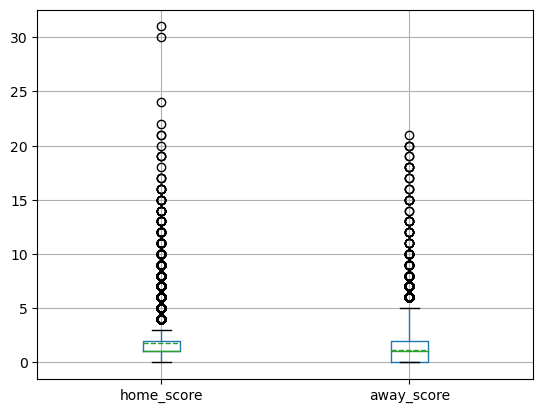

In [10]:
results[["home_score", "away_score"]].boxplot(showmeans=True, meanline=True);

Teams that play at home score more goals on average.<br/>
There was a game where the home team scored 31 goals and another where the away team scored 21. Before we go any further, let's check which games we are talking about.

In [11]:
results[(results["home_score"] == 31) | (results["away_score"] == 21)]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
24160,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False
27753,2005-03-11,Guam,North Korea,0,21,EAFF Championship,Taipei,Taiwan,True


**Australia vs American Samoa**<br/>
On 11 April 2001, the Australian and American Samoan national association football teams played each other in an Oceanian qualifying match for the 2002 FIFA World Cup. The match was played at the International Sports Stadium in Coffs Harbour, Australia. Australia set a world record for the largest victory in an international football match, winning the game 31–0.

## **Data Processing**

First rename columns for plotting purpose
    

In [12]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [13]:
shootouts.columns

Index(['date', 'home_team', 'away_team', 'winner'], dtype='object')

In [14]:
results.rename(columns={"date": "Date", 
                        "home_team": "Home Team", 
                        "away_team": "Away Team", 
                        "home_score": "Home Score", 
                        "away_score": "Away Score",
                        "tournament" : "Tournament", 
                        "city": "City", 
                        "country": "Country", 
                        "neutral": "Neutral"}, inplace=True)

shootouts.rename(columns={"date": "Date", 
                          "home_team" : "Home Team",
                          "away_team" : "Away Team",
                          "winner": "Winner"}, inplace=True)

Merge results dataframe to shootouts dataframe to get the winner of matches that ended with penalty shootouts.

In [15]:
results = results.merge(shootouts, on=["Date", "Home Team", "Away Team"], how="left")

We will create columns with outcome of the match, the winner, the loser and total goals scored during the match to get faster access to the resutls. In addition we will add some time related columns and a column to show weither a match ended with penalty kicks.

In [16]:
# results.rename(columns={"Winner": "Shootouts"}, inplace=True)
results["Shootouts"] = results["Winner"].apply(lambda x: x is not np.nan)

In [17]:
results["Outcome"] = results.apply(lambda x: "H" if x["Home Score"] > x["Away Score"] else("A" if x["Home Score"] < x["Away Score"] else"D")
                                    , axis=1)

results["Winner"] = results.apply(lambda x: x["Winner"] if x["Winner"] is not np.nan
                                  else (x["Home Team"] if x["Home Score"] > x["Away Score"] 
                                        else (x["Away Team"] if x["Home Score"] < x["Away Score"] else np.nan)),
                                  axis=1)

results["Loser"] = results.apply(lambda x: np.nan if x["Winner"] is np.nan else(x["Home Team"] if x["Winner"] == x["Away Team"] else x["Away Team"]),
                                 axis=1)

results["Total Goals"] = results["Home Score"] + results["Away Score"]

results["Goal Difference"] = abs(results["Home Score"] - results["Away Score"])

results["Date"] = pd.to_datetime(results.Date)

results["Year"] = results.Date.dt.year

results["Decade"] = results.Year.apply(lambda x: x - int(str(x)[-1]))

results["Month"] = results.Date.dt.month

results["Day"] = results.Date.dt.day

results["Match Month"] = results.Date.dt.month_name(locale='English')

results["Week Day"] = results.Date.dt.day_name(locale="English")

results = results[['Date', 'Home Team', 'Away Team', 'Home Score', 'Away Score',
                   'Tournament', 'City', 'Country', 'Neutral', 'Shootouts',
                   'Outcome', 'Winner', 'Loser', 'Total Goals', "Goal Difference", 'Year', 'Decade', 'Month', 'Day',
                   "Match Month", 'Week Day']]

results.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Tournament,City,Country,Neutral,Shootouts,...,Winner,Loser,Total Goals,Goal Difference,Year,Decade,Month,Day,Match Month,Week Day
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,False,...,NaN,NaN,0,0,1872,1870,11,30,November,Saturday
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,False,...,England,Scotland,6,2,1873,1870,3,8,March,Saturday
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,False,...,Scotland,England,3,1,1874,1870,3,7,March,Saturday
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,False,...,NaN,NaN,4,0,1875,1870,3,6,March,Saturday
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,False,...,Scotland,England,3,3,1876,1870,3,4,March,Saturday
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,False,...,Scotland,Wales,4,4,1876,1870,3,25,March,Saturday
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,False,...,Scotland,England,4,2,1877,1870,3,3,March,Saturday
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,False,...,Scotland,Wales,2,2,1877,1870,3,5,March,Monday
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,False,...,Scotland,England,9,5,1878,1870,3,2,March,Saturday
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,False,...,Scotland,Wales,9,9,1878,1870,3,23,March,Saturday


## **Visualization**

## Case Study: Cameroon

### **How has football been adopted over the year?**

In [18]:
all_teams = list(results["Home Team"].unique())
all_teams.extend(results["Away Team"].unique())
all_teams_df = pd.DataFrame({"Team" : list(set(all_teams))})
all_teams_df["First Game Date"] = all_teams_df["Team"].apply(lambda x: results[(results["Home Team"] == x) | 
                                                                               (results["Away Team"] == x)] \
                                                             .head(1)["Date"].values[0])

all_teams_df["First Game Year"] = all_teams_df["Team"].apply(lambda x: results[(results["Home Team"] == x) | 
                                                                               (results["Away Team"] == x)] \
                                                             .head(1)["Year"].values[0])

all_teams_df["First Game Decade"] = all_teams_df["First Game Year"] - all_teams_df["First Game Year"] % 10
all_teams_df = all_teams_df.merge(affiliations_df, on=["Team"], how="left")
all_teams_df.sort_values(by="First Game Year", inplace=True)
all_teams_df.head()

,Team,First Game Date,First Game Year,First Game Decade,Affiliation,Region
8,Scotland,1872-11-30,1872,1870,UEFA,Europe
214,England,1872-11-30,1872,1870,UEFA,Europe
77,Wales,1876-03-25,1876,1870,UEFA,Europe
281,Northern Ireland,1882-02-18,1882,1880,UEFA,Europe
306,United States,1885-11-28,1885,1880,CONCACAF,North and Central America


To understand how football was adopted over the years we will look at the football teams per decade.

In [19]:
new_teams_decade = all_teams_df["First Game Decade"].value_counts().sort_index()

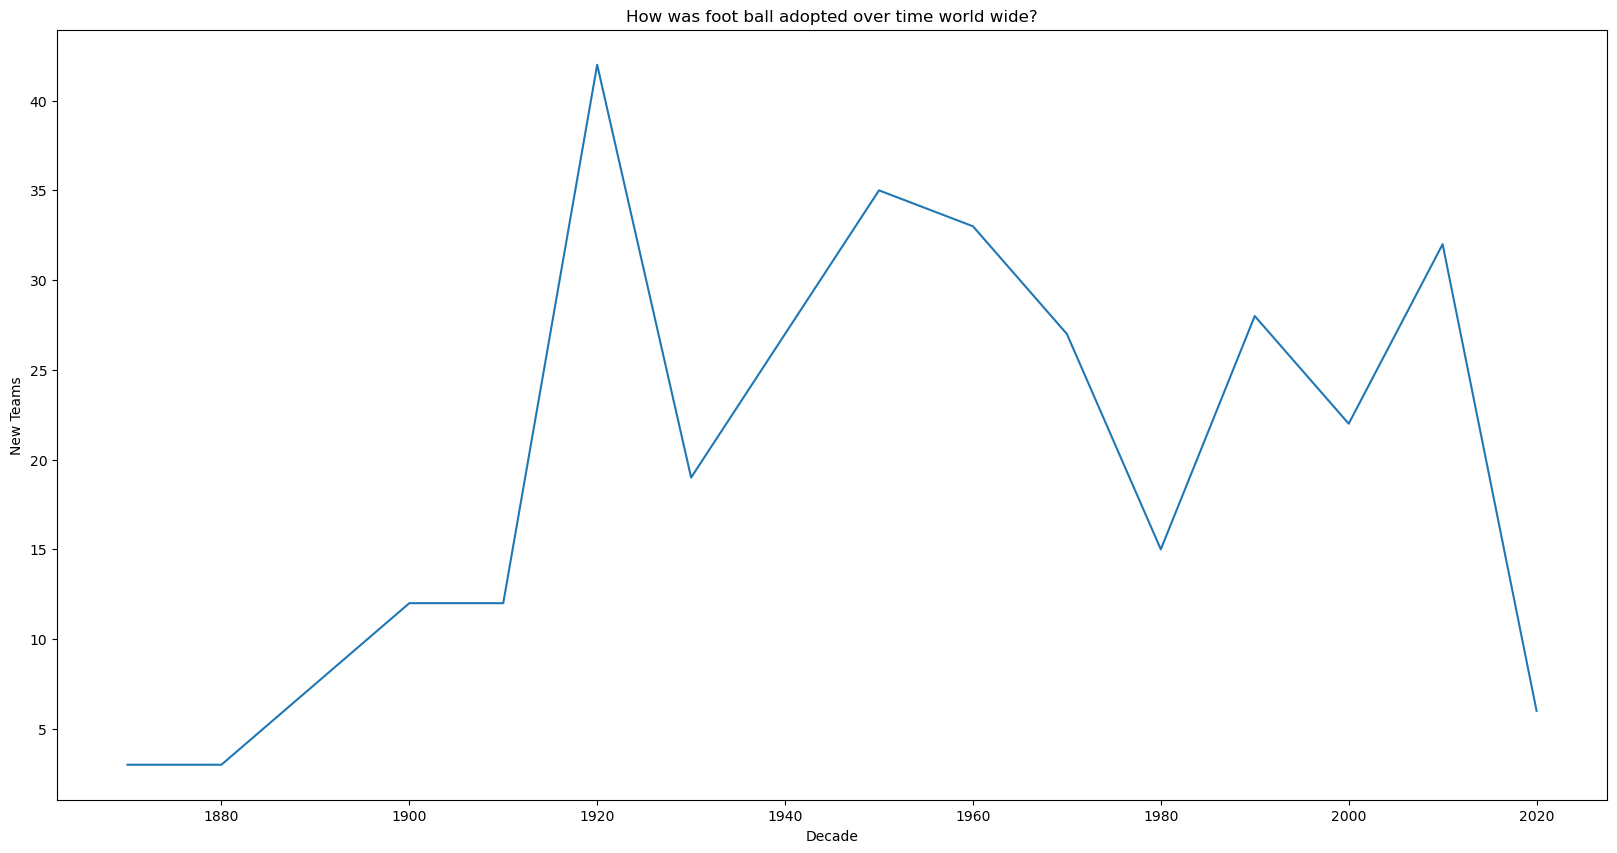

In [20]:
plt.figure(figsize=(20,10))
plt.xlabel("Decade")
plt.ylabel("New Teams")
sns.lineplot(data=new_teams_decade, x=new_teams_decade.index, y=new_teams_decade.values)
plt.title("How was foot ball adopted over time world wide?");

The number of national football teams started spiking from the very beginning and the 1920s. The trend reversed for a long time until the 80s.

In [21]:
new_teams_decade_africa = all_teams_df[all_teams_df["Region"] == "Africa"]["First Game Decade"].value_counts().sort_index()
new_teams_decade_africa

1920     4
1940    11
1950    12
1960    17
1970     7
1980     1
1990     1
2000     1
2010     1
Name: First Game Decade, dtype: int64

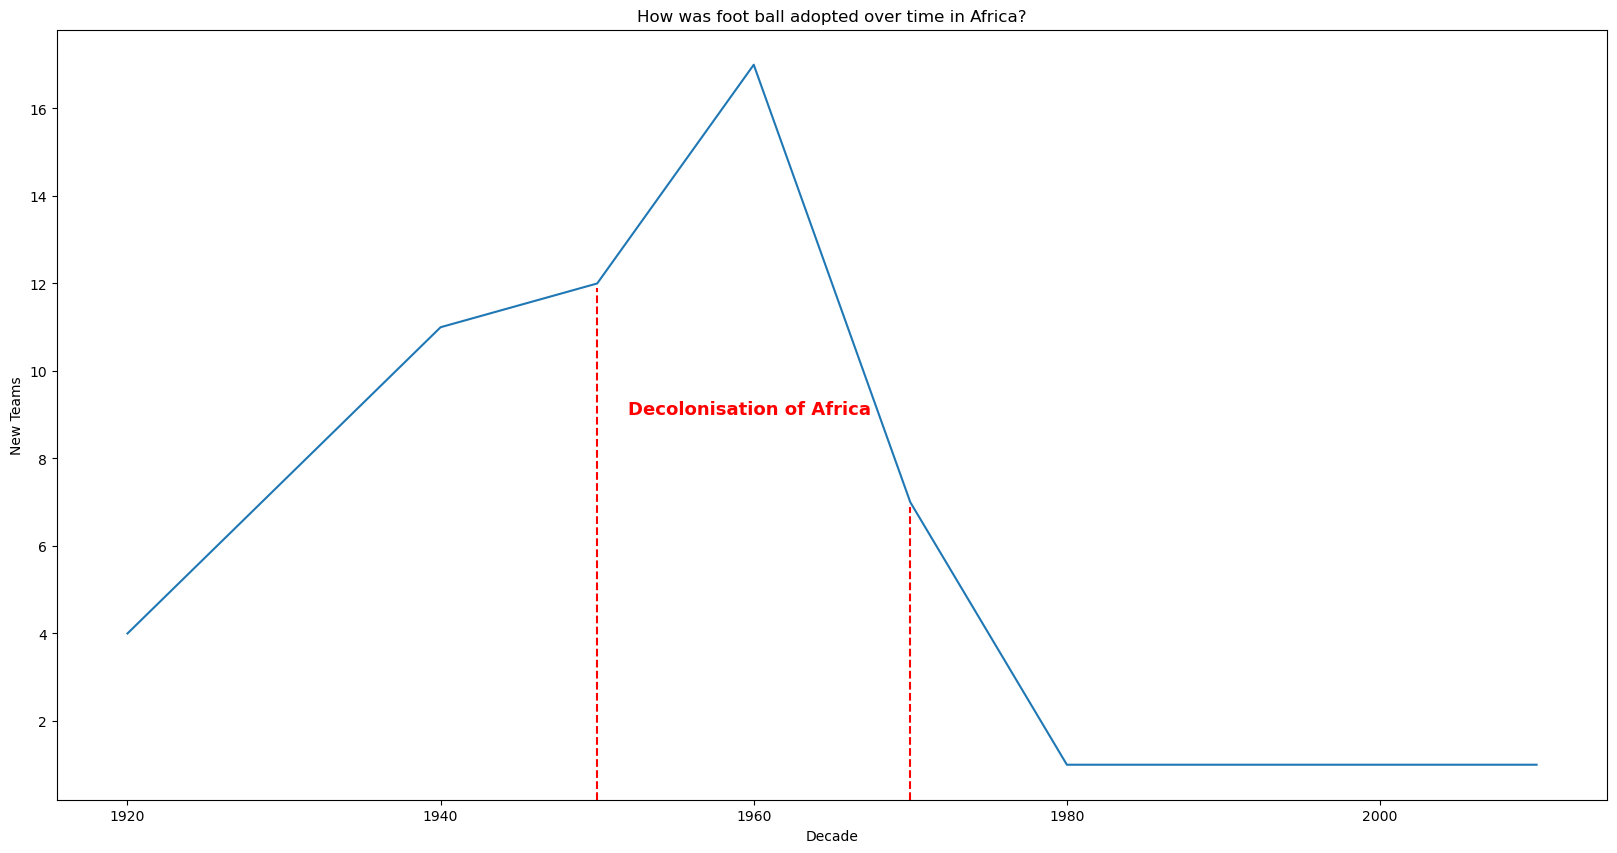

In [22]:
plt.figure(figsize=(20,10))
plt.xlabel("Decade")
plt.ylabel("New Teams")
sns.lineplot(data=new_teams_decade_africa, x=new_teams_decade_africa.index, y=new_teams_decade_africa.values)
plt.title("How was foot ball adopted over time in Africa?")
plt.axvline(x=1950, ymax=0.665, color="r", linestyle="dashed")
plt.axvline(x=1970, ymax=0.38, color="r", linestyle="dashed")
plt.text(1952, 9, "Decolonisation of Africa", color="r", size=13, weight="bold");

Simalar to the World Wide trend, the number of new African national teams started around the 1920s shortly after **World War I** as a few countries like Egypt and South Africa gained their independence. This increasing trend in new teams slowed down around the 1940s probably as a result of the World War II. Then spiked again in the 1950s and reached it peak in the 1960s where 17 new Countries played their first match. This was probably as a result of other African countries gaining their independence.

The increasing trend reversed by the 1970s as most African countries had already adopted football.

Lest check when the Cameroonian national team played its first match.

In [23]:
all_teams_df[all_teams_df.Team == "Cameroon"]

,Team,First Game Date,First Game Year,First Game Decade,Affiliation,Region
27,Cameroon,1960-04-14,1960,1960,CAF,Africa


Cameroon was amongt the 17 African countries that played their first football match in the 1960s. More precisely Cameroon played its first match on the 14 of April 1960 shortly after it gained its idependence.

In [24]:
cameroon_results_df = results.loc[((results["Home Team"] == "Cameroon") | (results["Away Team"] == "Cameroon"))]

In [25]:
cameroon_results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 4688 to 44328
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             576 non-null    datetime64[ns]
 1   Home Team        576 non-null    object        
 2   Away Team        576 non-null    object        
 3   Home Score       576 non-null    int64         
 4   Away Score       576 non-null    int64         
 5   Tournament       576 non-null    object        
 6   City             576 non-null    object        
 7   Country          576 non-null    object        
 8   Neutral          576 non-null    bool          
 9   Shootouts        576 non-null    bool          
 10  Outcome          576 non-null    object        
 11  Winner           411 non-null    object        
 12  Loser            411 non-null    object        
 13  Total Goals      576 non-null    int64         
 14  Goal Difference  576 non-null    int6

There seems to be none values in the in the Winner and Loser columns. These actually represent the matches that ended up with a draw.

**How many matches per years?**

In [26]:
matches_per_year = cameroon_results_df[["Year", "Decade"]].value_counts().reset_index().sort_values(by=["Year"])
matches_per_year.rename(columns={0: "Count"}, inplace=True)

In [27]:
world_cup_years = cameroon_results_df[cameroon_results_df['Tournament'] == 'FIFA World Cup']['Year'].unique()
world_cup_years_games = matches_per_year[matches_per_year.Year.isin(world_cup_years)]

afcon_years = cameroon_results_df[cameroon_results_df["Tournament"] == "African Cup of Nations"]["Year"].unique()
afcon_years_games = matches_per_year[matches_per_year.Year.isin(afcon_years)]

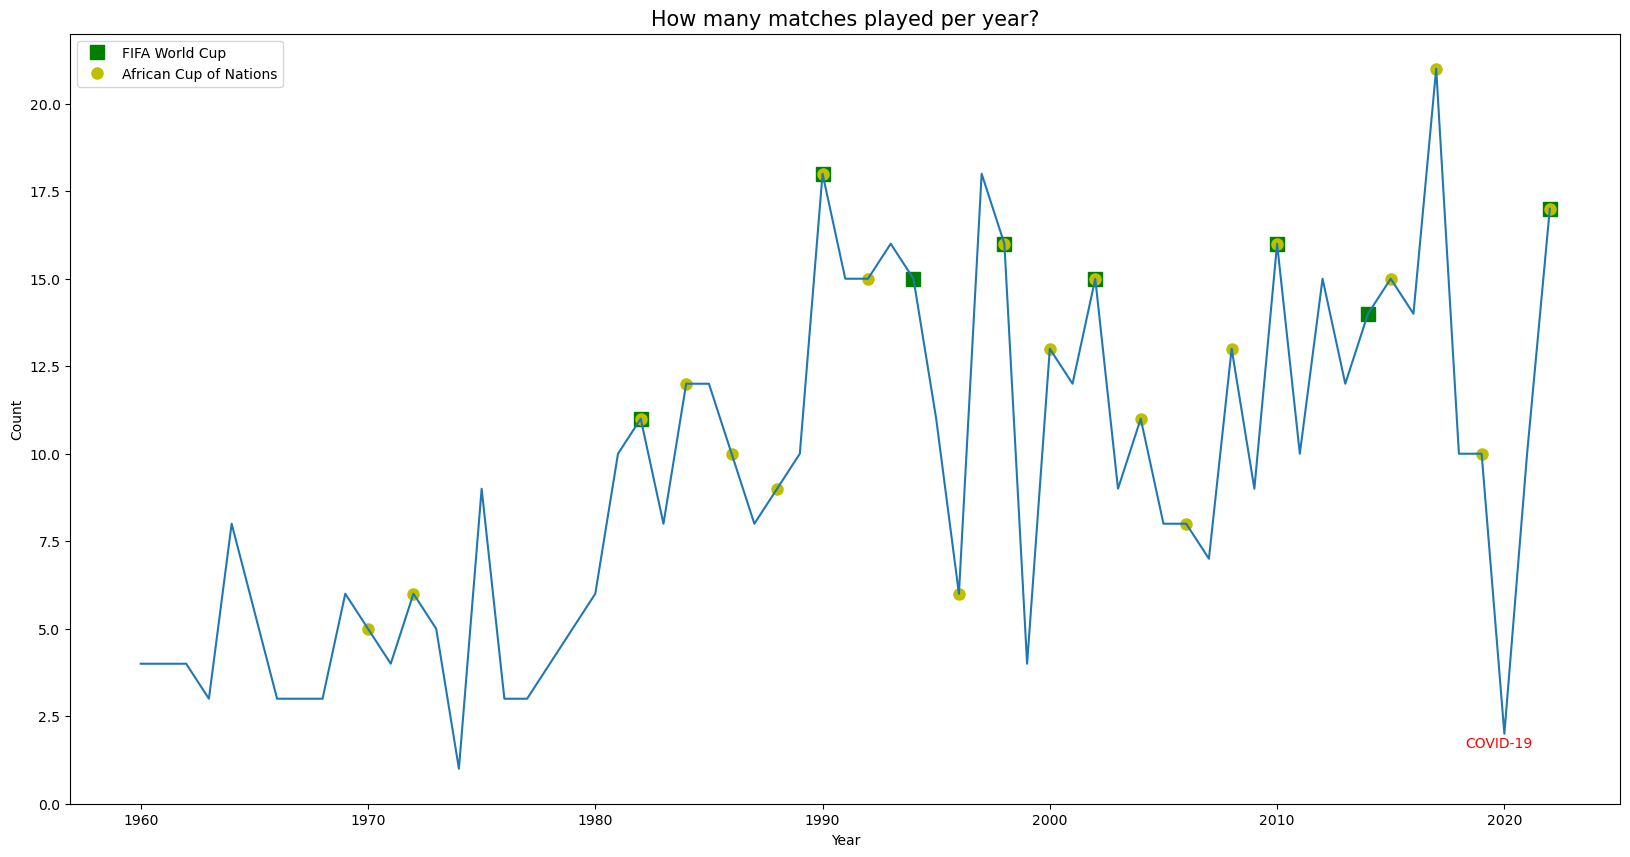

In [28]:
plt.figure(figsize=(20,10))

# Shows the years when Cameroon participated at the FIFA World Cup and the African Cup of Nations.
plt.plot("Year", "Count", "gs", data=world_cup_years_games, label="FIFA World Cup", markersize=10)
plt.plot("Year", "Count", "yo", data=afcon_years_games, label="African Cup of Nations", markersize=8)

sns.lineplot(data=matches_per_year, x="Year", y="Count")
plt.title("How many matches played per year?", size=15)
plt.text(2018.3, 1.6, "COVID-19", color="r");

Generally the Cameroonina football team played more matches on years where they participated in major tournaments. The overall number of matches played by the Cameroonian team seems to be on the increase since 1980 as more matches were played for major competitions and their qualifying rounds. 

The bigest drop in matches played was in 2020 caused by the COVID-19.

</br>**Number of participations per tournament**

We wil start by filtering out friendly matches and tournament qualification rounds from the tournament list.

In [29]:
excluded = ["Friendly", "African Cup of Nations qualification", "FIFA World Cup qualification"]

cm_tournament = cameroon_results_df[cameroon_results_df.Tournament.apply(lambda x: False if x in excluded else True)]
cm_tournament_df = cm_tournament.groupby(["Tournament", "Year"]).first()

tournaments = cm_tournament_df.index.get_level_values(0).unique()

In [102]:
data = []
for tournament in tournaments:
    count = cm_tournament_df.Date[cm_tournament_df.index.get_level_values(0) == tournament].count()
    data.append(count)
    
number_participations = pd.Series(data, index=tournaments).sort_index()

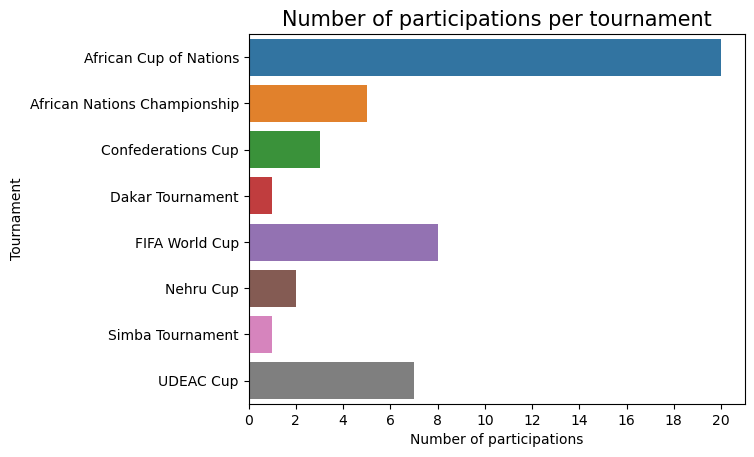

In [103]:
sns.barplot(x=number_participations, y=number_participations.index, estimator="max")
plt.title('Number of participations per tournament', size=15)
plt.xticks([i for i in range(0, max(data) + 1, 2)])
plt.xlabel("Number of participations");

In total Cameroon participated in 47 competitions with 20 of them being an African Cup of Nations and 8 a FIFA World Cup

**The Nehru Cup** was an international association football tournament organised by the All India Football Federation (AIFF), named after the first Prime Minister of India, Jawaharlal Nehru. It was launched in 1982, but was not held from 1998 to 2006. After the trophy was won by Iraq in 1997, it was reinstated only in 2007 before officially being held last in 2012 and was replaced in 2017.

</br>

***How many matches were played per tournament?***

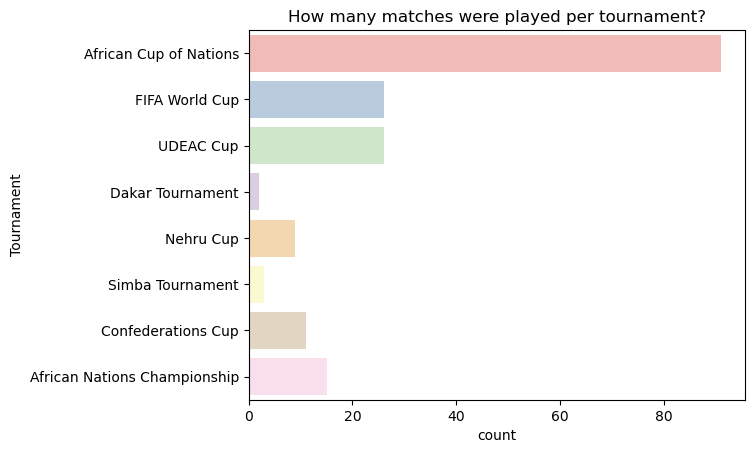

In [104]:
sns.countplot(y=cm_tournament.Tournament.sort_index(), palette="Pastel1")
plt.title("How many matches were played per tournament?");

**What is the percentage of matches played per tournament?**

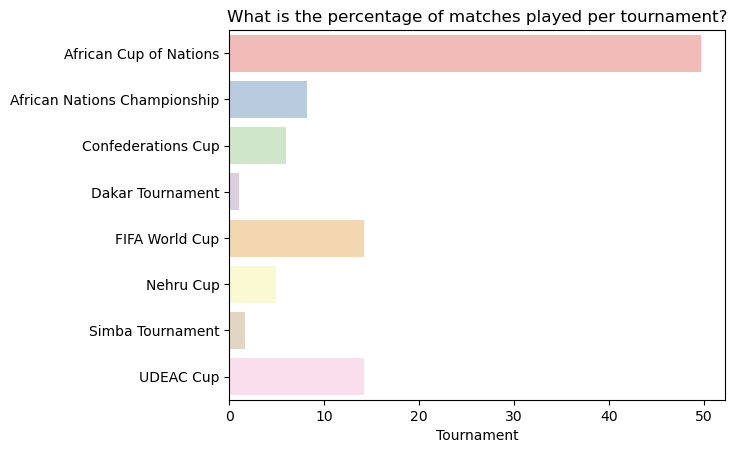

In [99]:
pct_match_per_tournament = cm_tournament.Tournament.value_counts() * 100 / cm_tournament.Tournament.count()
pct_match_per_tournament = pct_match_per_tournament.sort_index()

sns.barplot(x=pct_match_per_tournament, y=pct_match_per_tournament.index, palette="Pastel1")
plt.title("What is the percentage of matches played per tournament?");

A majority of tournament matches played by Cameroon are from the African Cup of Nations with a whapping 50% of overall competition matches, followed by the FIFA world Cup and the UDEAC Cup averaging about 15% each.

</br>**Number of finals played per tournament**

In [107]:
cm_tournaments = results[results.Tournament.apply(lambda x: True if x in tournaments else False)]

In [112]:
finals = cm_tournaments.groupby(["Tournament", "Year"]).last()
cm_finals = finals[(finals["Home Team"] == "Cameroon") | (finals["Away Team"] == "Cameroon") \
                   & (finals.index.get_level_values(0) != "Dakar Tournament")]
finals_played = cm_finals.index.get_level_values(0).value_counts()

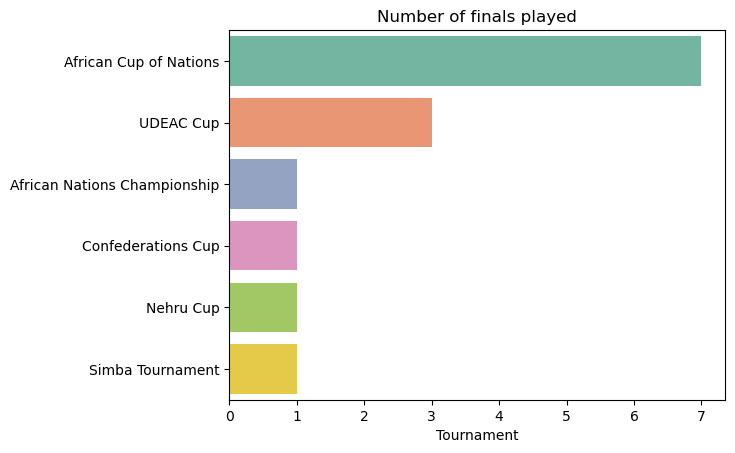

In [116]:
sns.barplot(x=finals_played , y=finals_played.index, palette="Set2")
plt.title("Number of finals played");

For it 20 participations in at the African cup of Nations Cameroon reached the final rounds 7 times.

</br>**How many tournaments won?**

In [35]:
tournaments_won = cm_finals[cm_finals.Winner == "Cameroon"].index.get_level_values(0)
tournaments_won = tournaments_won.value_counts()

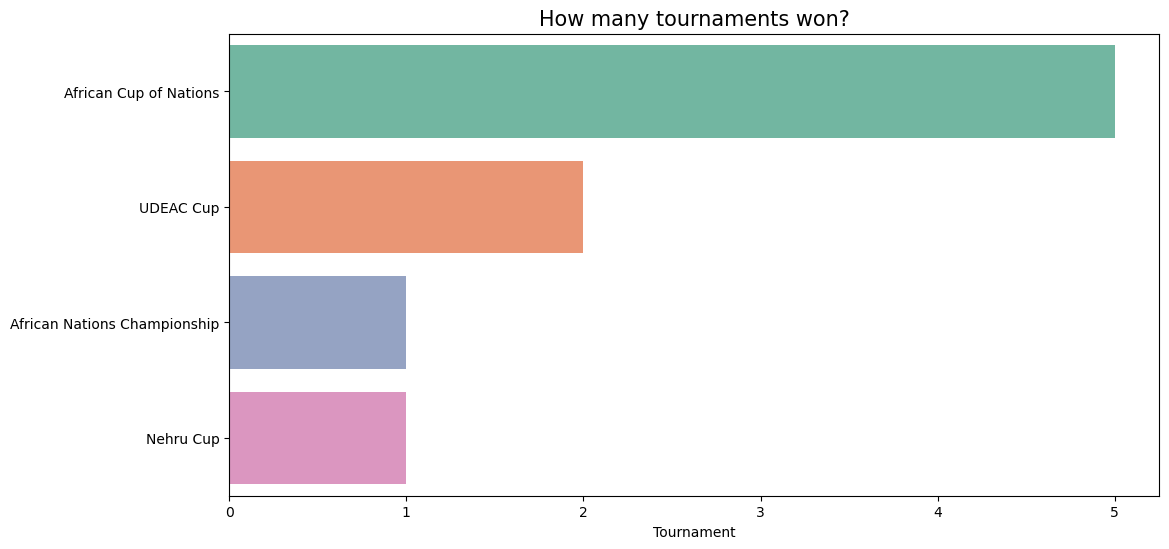

In [117]:
plt.figure(figsize=(12,6))
sns.barplot(x=tournaments_won, y=tournaments_won.index, palette="Set2")
plt.title("How many tournaments won?", size=15);

Of the 7 African Cup of Nations finals the Cameroonian Football team played, the won 5.

</br>

**What is the average goals scored per year?**

Before plotting goals related analysis we need to extract relevant data from cameroon_results_df.

In [37]:
goals_scored_home = cameroon_results_df[cameroon_results_df["Home Team"] == "Cameroon"][["Date", "Home Score", "Year", "Decade", "Tournament"]]
goals_scored_home.rename(columns={"Home Score": "Goals Scored"}, inplace=True)

goals_scored_away = cameroon_results_df[cameroon_results_df["Away Team"] == "Cameroon"][["Date", "Away Score", "Year", "Decade", "Tournament"]]
goals_scored_away.rename(columns={"Away Score": "Goals Scored"}, inplace=True)

goals_scored = pd.concat([goals_scored_home, goals_scored_away]).sort_values(by="Date")

goals_conceded_home = cameroon_results_df[cameroon_results_df["Away Team"] != "Cameroon"][["Date", 'Away Score', "Year", "Decade", "Tournament"]]
goals_conceded_home.rename(columns={"Away Score": "Goals Conceded"}, inplace=True)

goals_conceded_away = cameroon_results_df[cameroon_results_df["Home Team"] != "Cameroon"][["Date", 'Home Score', "Year", "Decade", "Tournament"]]
goals_conceded_away.rename(columns={'Home Score': "Goals Conceded"}, inplace=True)

goals_conceded = pd.concat([goals_conceded_home, goals_conceded_away]).sort_values(by="Date")

goals_df = pd.concat([goals_scored, goals_conceded["Goals Conceded"]], axis=1)
goals_df["Goal Difference"] = goals_df["Goals Scored"] - goals_df["Goals Conceded"]

goals_df = goals_df[["Date", "Goals Scored", "Goals Conceded", "Goal Difference", "Year", "Decade", "Tournament"]]

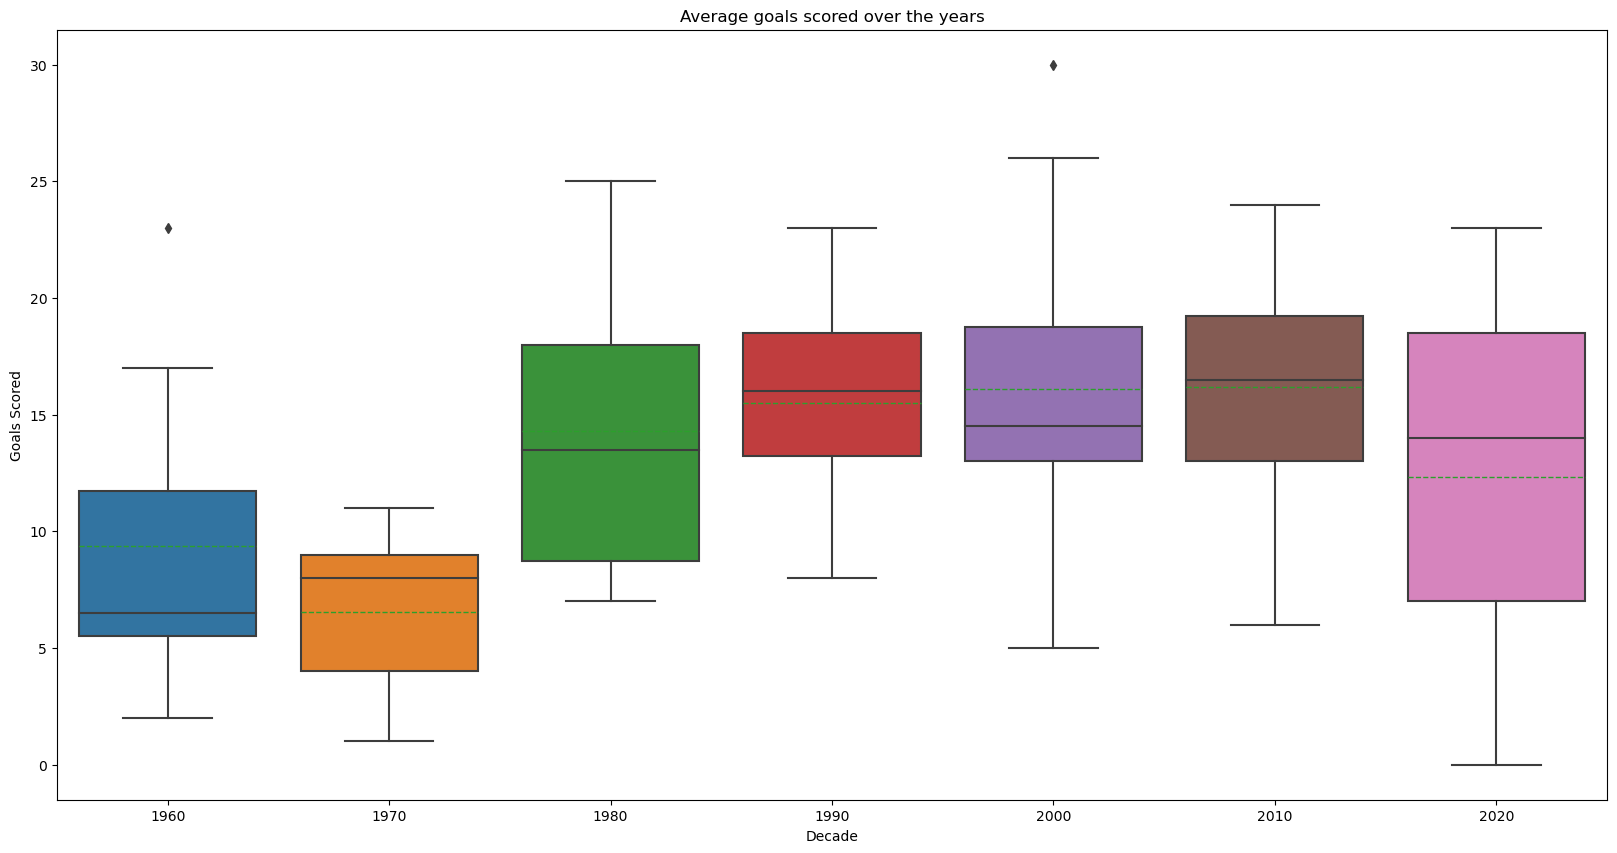

In [43]:
goals_per_year = goals_df.groupby("Year")[["Goals Scored", "Goals Conceded", "Goal Difference"]].sum()
goals_per_year["Decade"] = goals_per_year.index -goals_per_year.index % 10


plt.figure(figsize=(20, 10))
sns.boxplot(data=goals_per_year, x="Decade", y="Goals Scored", showmeans=True, meanline=True)
# plt.xticks(rotation=90)
plt.title("Average goals scored over the years"); 

The average goals scored by the Cameroonian team saw a downward trend in the 1970s. Then the trend reversed since the 1980s and slowed down in the 1990s.

</br> **Distribution of goals scored per match over the years?**

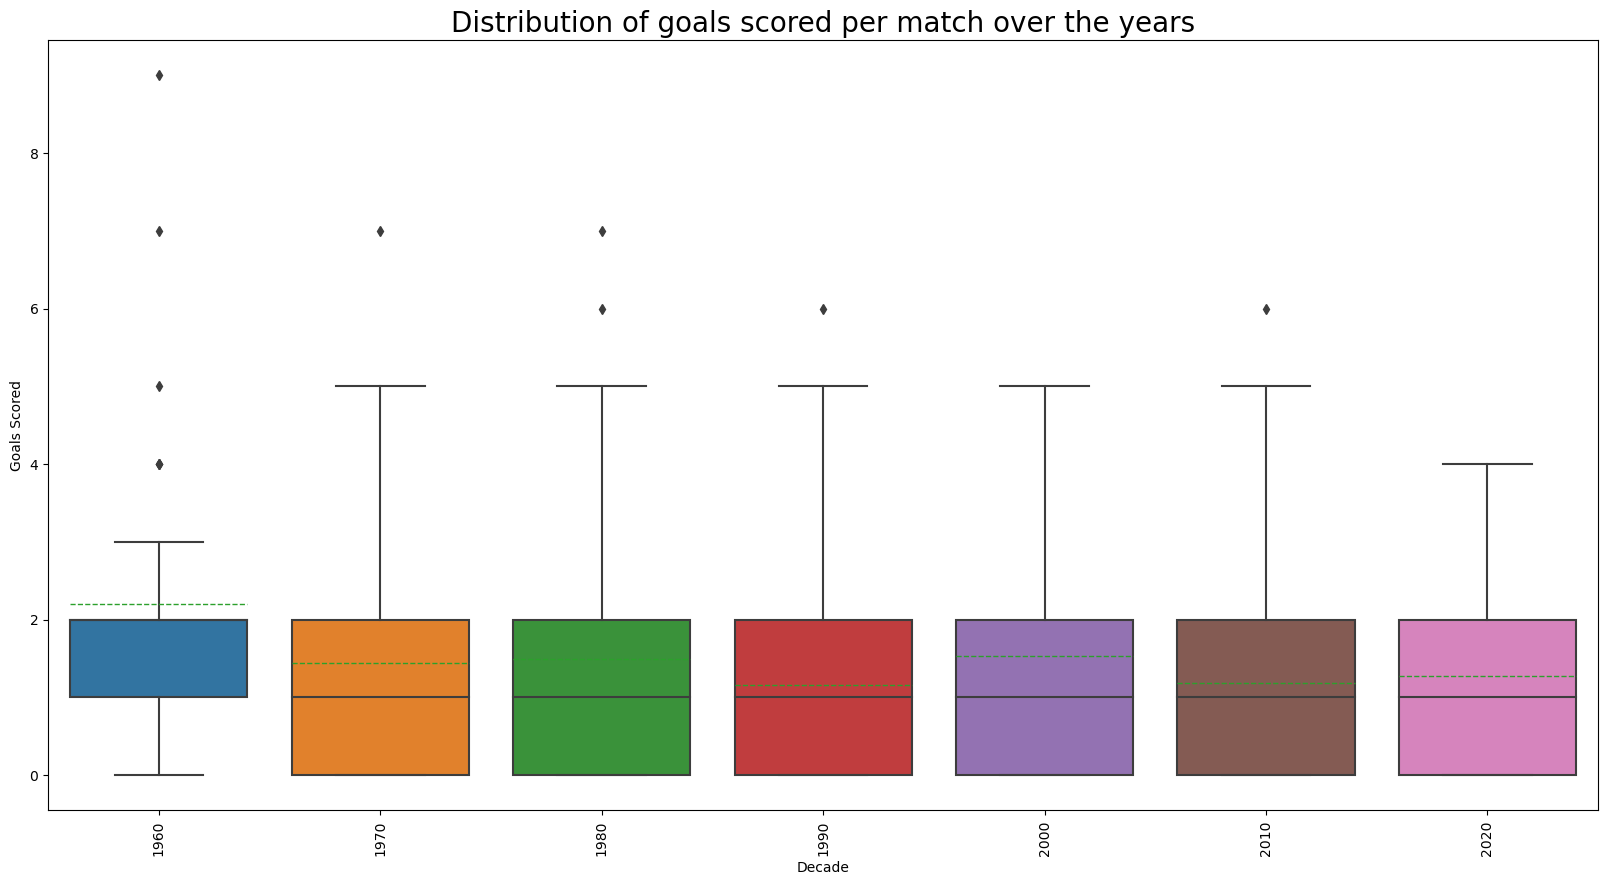

In [61]:
plt.figure(figsize=(20,10))
sns.boxplot(data=goals_df, x="Decade", y="Goals Scored", showmeans=True, meanline=True)
plt.xticks(rotation=90)
plt.title("Distribution of goals scored per match over the years", size=20);


</br>

**Distribution of conceded over the year**

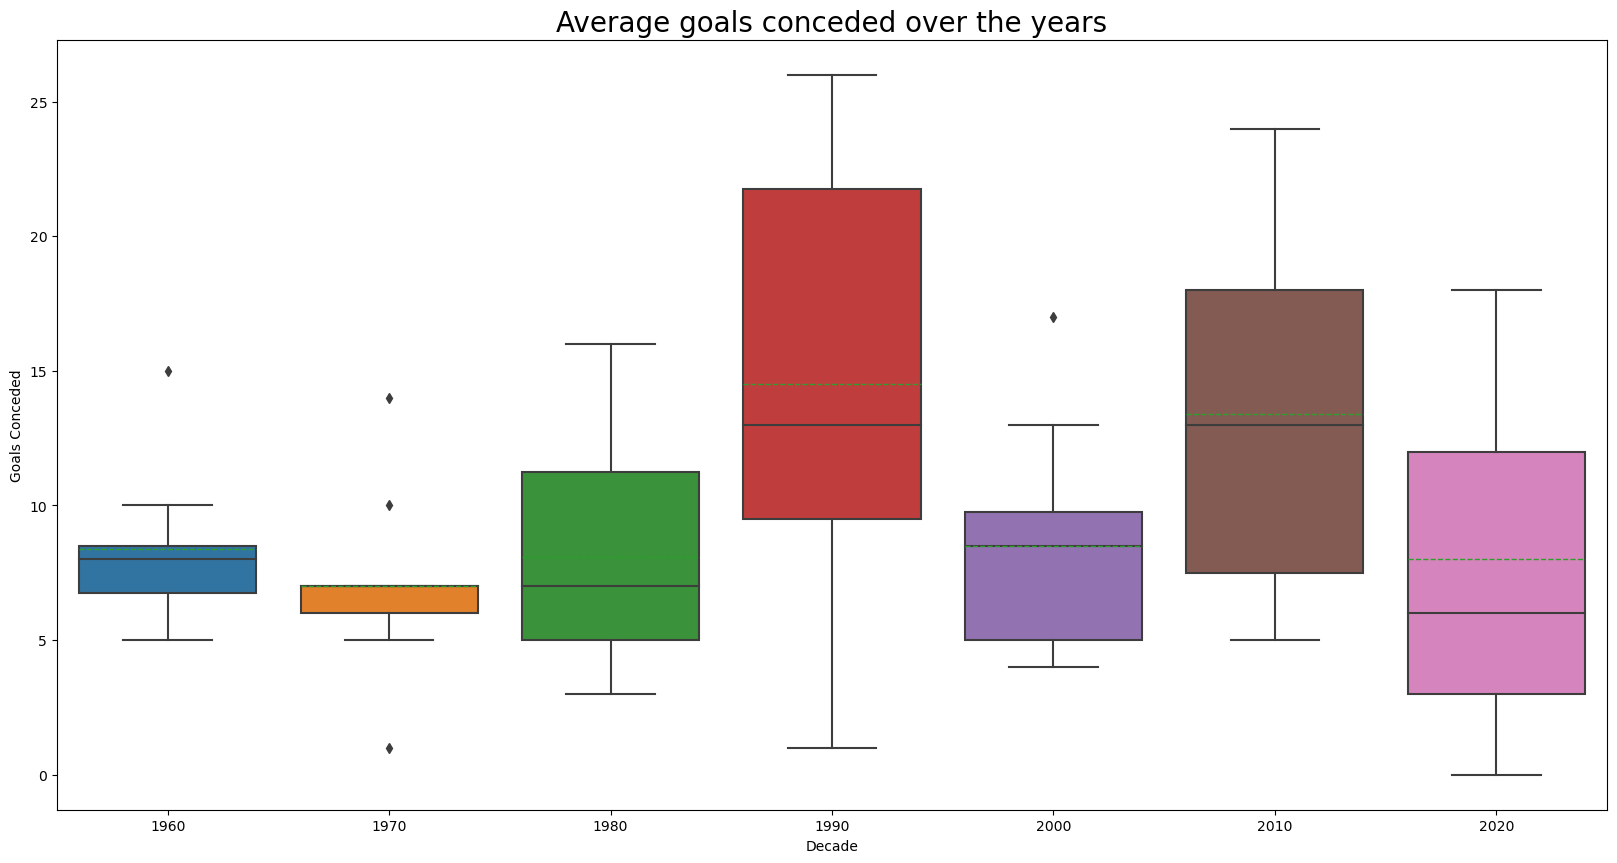

In [49]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=goals_per_year, y="Goals Conceded", x="Decade", showmeans=True, meanline=True)
plt.title("Distribution of goals conceded over the years", size=20);

In the 1990s, the Cameroonian Team

**Distribution of goals per match over the years**

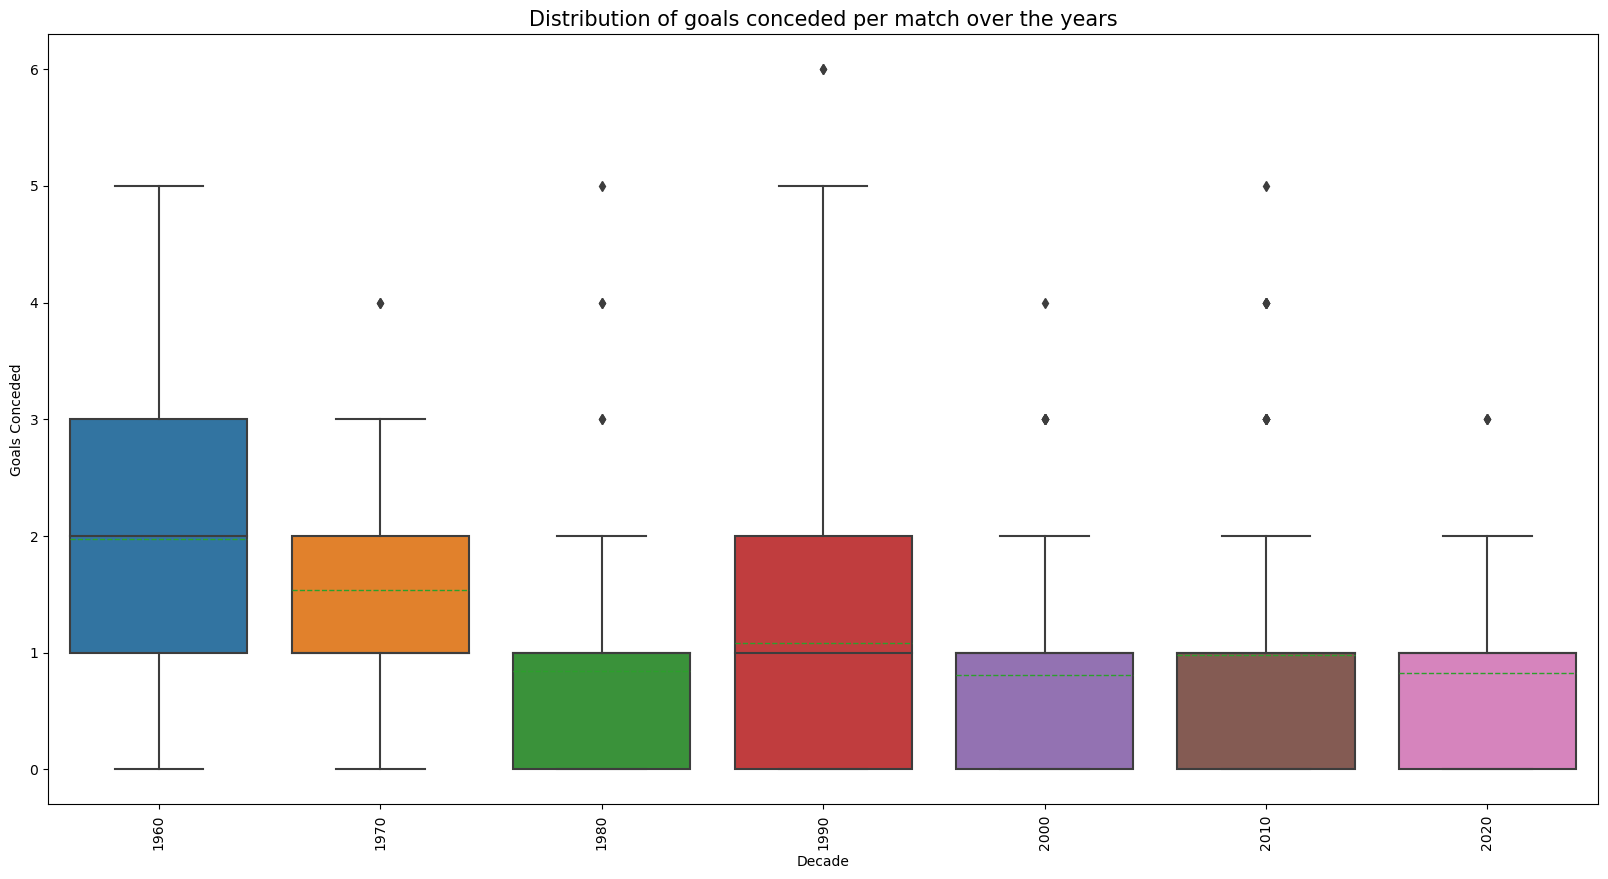

In [59]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=goals_df, y="Goals Conceded", x="Decade", showmeans=True, meanline=True)
plt.xticks(rotation=90)
plt.title("Distribution of goals conceded per match over the years", size=15);

</br>**What was the distribution of goal difference per year?**

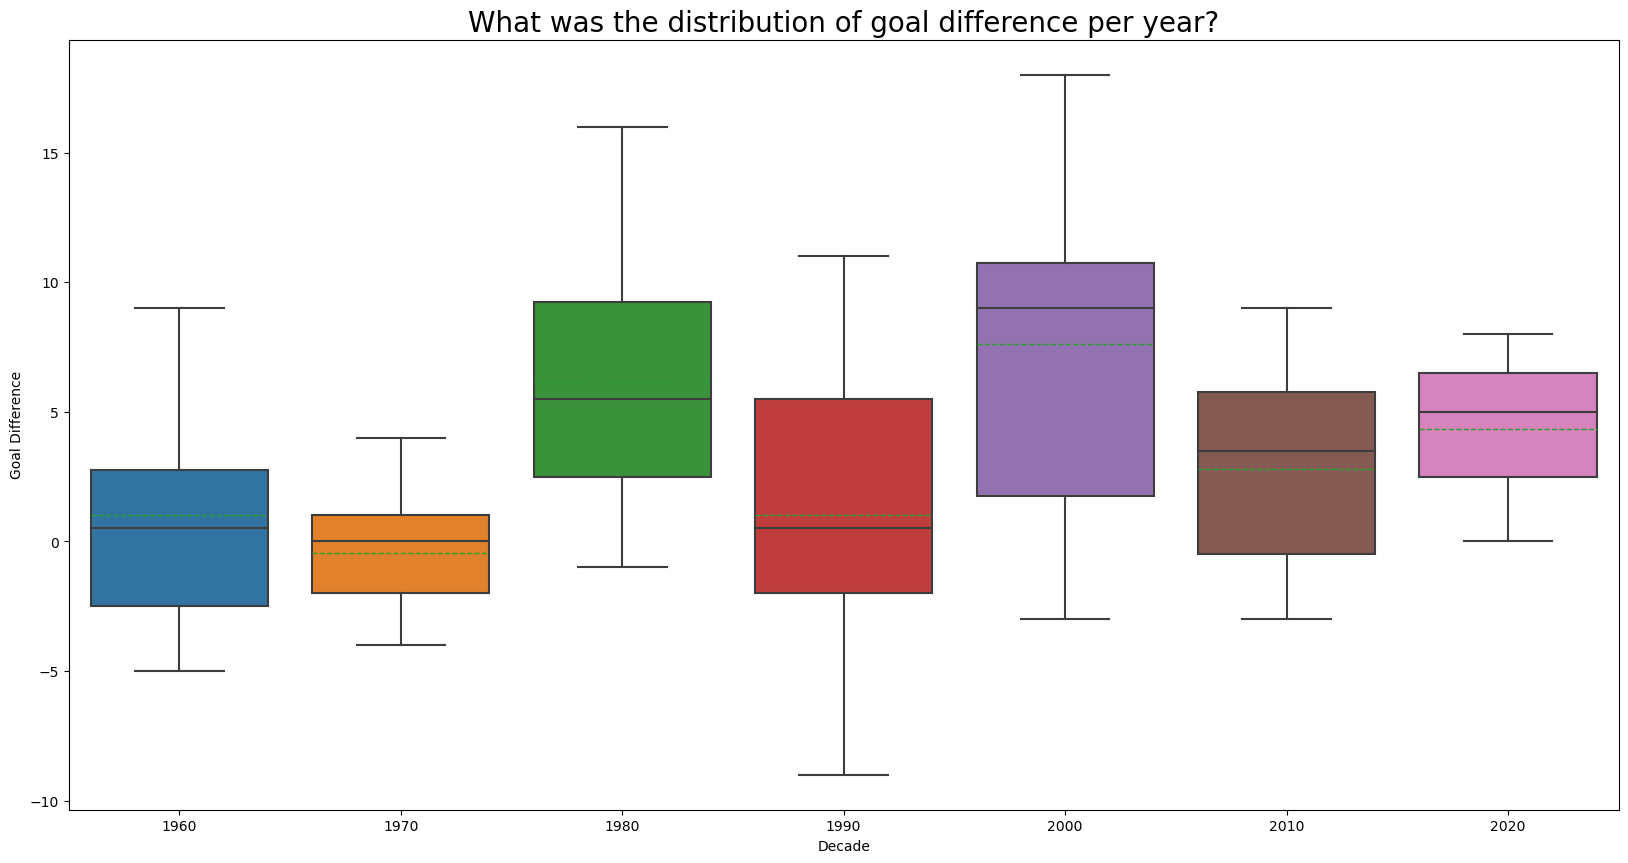

In [56]:
plt.figure(figsize=(20,10))
sns.boxplot(data=goals_per_year, x="Decade", y="Goal Difference", showmeans=True, meanline=True)
plt.title("What was the distribution of goal difference per year?", size=20);

</br> **What is the distribution of goal difference per match?**

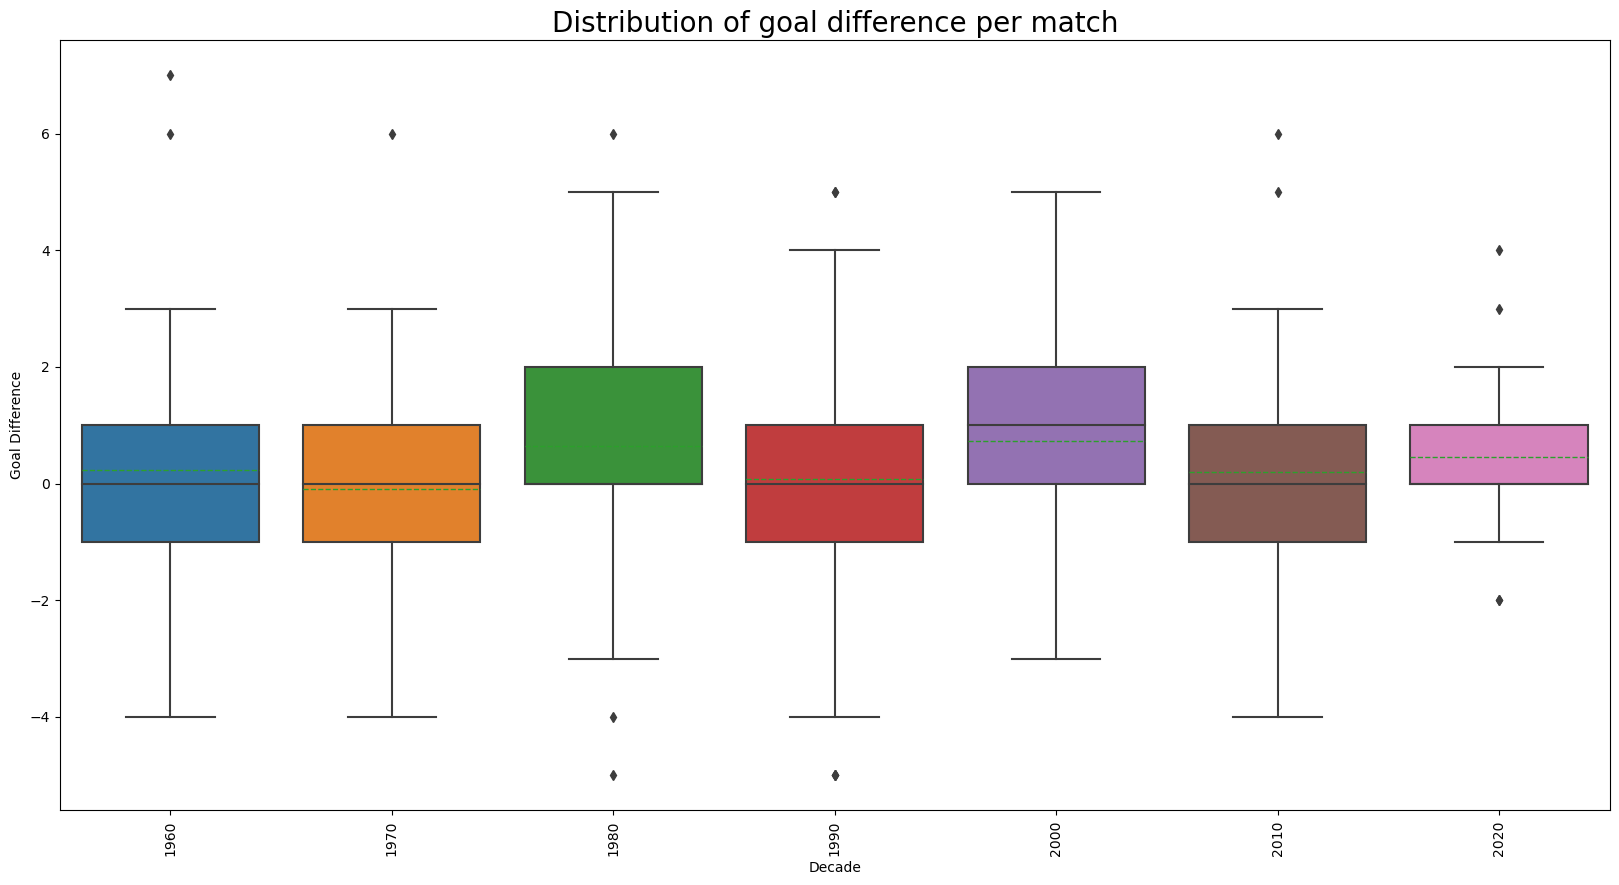

In [60]:
plt.figure(figsize=(20,10))
sns.boxplot(data=goals_df, x="Decade", y="Goal Difference", showmeans=True, meanline=True)
plt.xticks(rotation=90)
plt.title("Distribution of goal difference per match", size=20);

Over the years the cameroonian team has kep. Although in the 1980s and the 2000s the most the matches ended with a goal difference between 0 and 2 with a median 1, which denotes they lost less matches as 50% of the data stand between the Q1 of 0 and a Q3 of 2. 

### ***Results***

In [108]:
goals_df["Outcome"] = goals_df["Goal Difference"].apply(lambda x: "Won" if x > 0 else ("Lost" if x < 0 else "Draw"))

**What is the distribution of match outcome overall?**

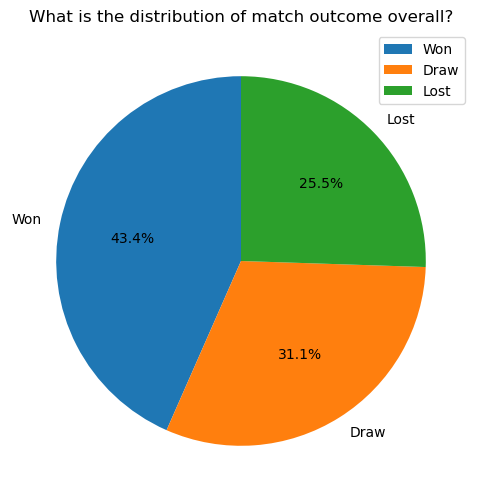

In [106]:
cm_win_loss = goals_df.Outcome.value_counts()
cm_win_loss.plot(kind="pie", autopct="%1.1f%%", startangle=90, figsize=(12,6), legend=True, ylabel=None)
plt.title("What is the distribution of match outcome overall?")
plt.ylabel(None);

In its history the Cameroonian football team has won over 40% of their mathes and lost 25.5% of their matches. This shows that the Cameroonian team has quite a solid team but still has relatively high chances of losing a match.

**How were match outcomes distributed over the years?**